## Project Title: **Stock Price Prediction Using LSTM (Long Short-Term Memory)**

#### Project Description:
This project predicts stock prices for Apple Inc. (AAPL) using **LSTM (Long Short-Term Memory)**, a type of **Recurrent Neural Network (RNN)** suited for sequential data like stock prices. The goal is to forecast future prices based on historical data.

The process begins by fetching stock data from the **Alpha Vantage API** and performing **Exploratory Data Analysis (EDA)**. Data is then preprocessed by normalizing and creating input sequences. The dataset is split into training and testing sets, and an LSTM model with dropout layers is built to prevent overfitting. The model is trained and evaluated using key metrics like **MAE**, **MSE**, **RMSE**, and **R² Score**. Finally, the model predicts future prices based on the last 60 days and visualizes the comparison between actual and predicted stock prices.

This project showcases the effectiveness of LSTM for time-series forecasting in financial markets.

- By Jharana Adhikari

 ### Step 1: Import Required Libraries

In [3]:
!pip install alpha-vantage

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from alpha_vantage.timeseries import TimeSeries  

### Step 2: Loading and Exploring the Dataset

In [6]:
api_key = "FSNZBK6MCYO6VTQ3"  # Get API key from https://www.alphavantage.co/support/#api-key
ts = TimeSeries(key=api_key, output_format="pandas")
df, meta_data = ts.get_daily(symbol="AAPL", outputsize="full")

In [7]:
# Display first few rows
print(df.head())

            1. open   2. high  3. low  4. close   5. volume
date                                                       
2025-03-14  211.250  213.9500  209.58    213.49  60107582.0
2025-03-13  215.950  216.8394  208.42    209.68  61368330.0
2025-03-12  220.140  221.7500  214.91    216.98  62547467.0
2025-03-11  223.805  225.8399  217.45    220.84  76137410.0
2025-03-10  235.540  236.1600  224.22    227.48  71451281.0


In [8]:
# Check for missing values
print(df.isnull().sum())

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64


In [9]:
# Convert index to datetime format
df.index = pd.to_datetime(df.index)

In [10]:
df = df.sort_index()  # Ensure data is in correct order


In [11]:
df = df[['4. close']]  # Use only closing prices


In [12]:
df.rename(columns={'4. close': 'Close'}, inplace=True)

In [13]:
df.head()

,Close
date,
1999-11-01,77.62
1999-11-02,80.25
1999-11-03,81.50
1999-11-04,83.62
1999-11-05,88.31


### Step 3: Exploratory Data Analysis (EDA)

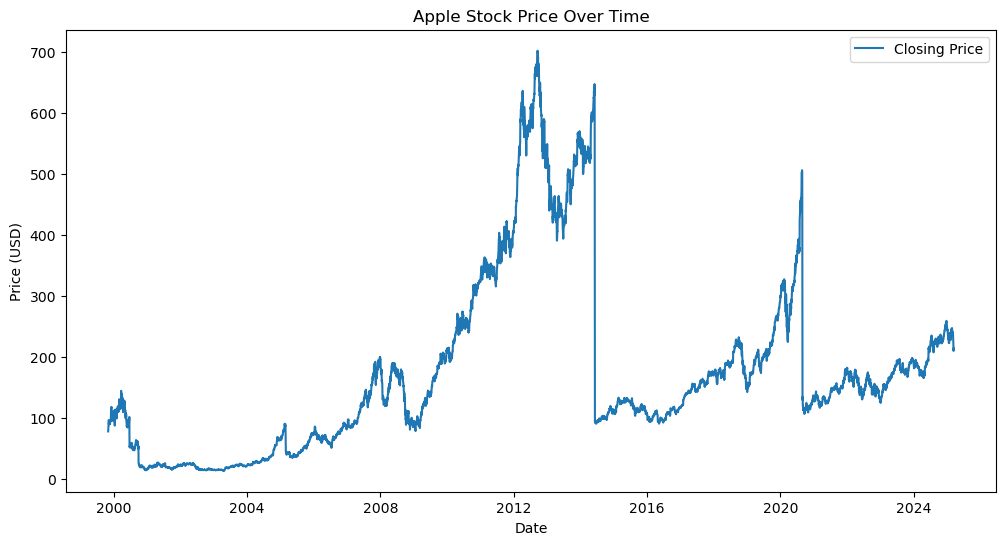

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df, label="Closing Price")
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### **Key Takeaways from the Apple Stock Price Over Time Line chart **  

- **2000–2004:** Apple’s stock price remained relatively low with minimal fluctuations.  
- **2008–2012:** Significant upward trend, likely due to the success of iPhones and other Apple products.  
- **2012–2015:** Sharp rise followed by a decline, possibly reflecting market corrections or product cycle impacts.  
- **2015–2020:** Another major spike with a sudden drop, which may indicate a stock split or external economic factors.  
- **2020–2024:** Noticeable volatility with steady growth, reflecting market trends and Apple’s continued innovation.

### Step 4: Preprocess Data

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

In [18]:
df_scaled

array([[0.09361665],
       [0.09743389],
       [0.09924816],
       ...,
       [0.29588667],
       [0.2852913 ],
       [0.29082121]])

In [19]:
# Create sequences for training
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(df_scaled, time_step)

### Step 5: Train-Test Split

In [21]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Step 6: Build LSTM RNN Model

In [23]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\yoga1st\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



## Step 7: Train the Mode)


In [25]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0103 - val_loss: 0.0013
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - loss: 9.9819e-04 - val_loss: 0.0016
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 0.0012 - val_loss: 9.4353e-04
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - loss: 6.7103e-04 - val_loss: 8.7040e-04
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - loss: 5.8874e-04 - val_loss: 6.6483e-04
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - loss: 6.4400e-04 - val_loss: 6.2815e-04
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 7.2445e-04 - val_loss: 6.0597e-04
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - loss: 6.8242e-04 - val_loss: 5.8658e-04
Epoch 9/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 4.3103e-04 - val_loss: 4.7979e-04
Epoch 10/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - loss: 6.5656e-04 - val_loss: 4.8900e-04
Epoch 11/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step

### Step 8: Evaluate Model Performance

In [27]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


### Step 9: Predict Future Prices

In [29]:
# Check if we have enough data for sequences
if len(df_scaled) <= time_step:
    raise ValueError(f"Not enough data to create sequences. Available data length: {len(df_scaled)}. Required: {time_step + 1}.")

# Slice the last (time_step + 1) data points
future_test_data = df_scaled[-(time_step + 1):]

# Print the future_test_data for debugging
print("Future Test Data:")
print(future_test_data)

Future Test Data:
[[0.34109844]
 [0.34532207]
 [0.34886354]
 [0.34098232]
 [0.34350779]
 [0.35032947]
 [0.35146158]
 [0.35571424]
 [0.35690441]
 [0.35192604]
 [0.34700572]
 [0.34442219]
 [0.33488635]
 [0.33417516]
 [0.33655549]
 [0.33250602]
 [0.33321722]
 [0.32472641]
 [0.32117043]
 [0.31954483]
 [0.32620686]
 [0.3122587 ]
 [0.31475515]
 [0.30410172]
 [0.30582891]
 [0.30558216]
 [0.30430491]
 [0.31458097]
 [0.32677291]
 [0.32836947]
 [0.32580046]
 [0.3234927 ]
 [0.31189585]
 [0.31884815]
 [0.31836918]
 [0.31945775]
 [0.31134431]
 [0.31137333]
 [0.3185869 ]
 [0.32475544]
 [0.33151906]
 [0.33597492]
 [0.33578623]
 [0.3363668 ]
 [0.33776017]
 [0.33735377]
 [0.33960347]
 [0.33951639]
 [0.32982089]
 [0.32537955]
 [0.331969  ]
 [0.32643908]
 [0.3233911 ]
 [0.32311533]
 [0.32252025]
 [0.32794856]
 [0.31112659]
 [0.30148916]
 [0.29588667]
 [0.2852913 ]
 [0.29082121]]


In [30]:
# Check the data shape
print("Future Test Data Shape:", future_test_data.shape)

# Ensure the data length is sufficient for the time_step
if len(future_test_data) < time_step:
    raise ValueError(f"Not enough data points. Available: {len(future_test_data)}, Required: {time_step}")

# Create sequences (use a simple loop to check if sequences are created)
X_future = []
for i in range(len(future_test_data) - time_step):
    X_future.append(future_test_data[i:i + time_step, 0])  # Slice data into sequences

X_future = np.array(X_future)

print("Shape of X_future after sequence creation:", X_future.shape)

# If no sequences were created, check the logic
if X_future.shape[0] == 0:
    raise ValueError(f"No sequences created. Check your data or sequence length. X_future shape: {X_future.shape}")

# Reshape the sequences for LSTM input
X_future = X_future.reshape(X_future.shape[0], X_future.shape[1], 1)

# Predict the future stock price
future_predicted_price = model.predict(X_future)
future_predicted_price = scaler.inverse_transform(future_predicted_price)

print("Predicted Future Price:", future_predicted_price)


Future Test Data Shape: (61, 1)
Shape of X_future after sequence creation: (1, 60)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Future Price: [[219.58305]]


### Step 10: Compare Actual vs. Predicted Prices

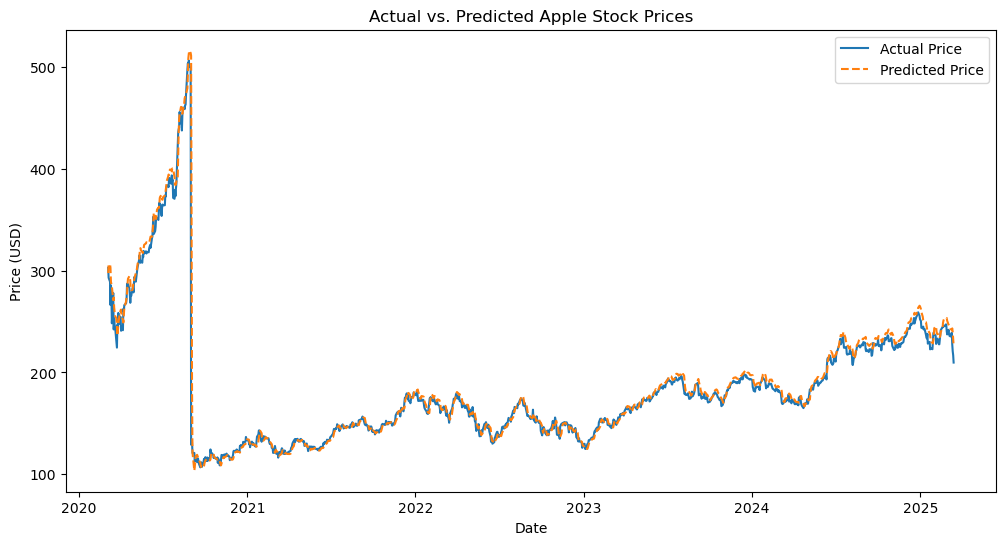

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label="Actual Price")
plt.plot(df.index[-len(y_pred):], y_pred, label="Predicted Price", linestyle="dashed")
plt.legend()
plt.title("Actual vs. Predicted Apple Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


### **Key Takeaways from the Line Chart**  

- **Comparison of Actual vs. Predicted Prices** – The model (LSTM) closely follows the actual stock price, indicating good predictive performance.  
- **High Accuracy in Recent Years** – From 2022 to 2025, the predicted prices align well with actual prices, showing minimal deviation.  
- **Significant Drop Around 2021** – A sharp decline is visible, possibly due to a stock split or a major market correction.  
- **Slight Deviations in Volatile Periods** – While the model captures trends well, small fluctuations in certain areas suggest minor prediction errors.  
- **LSTM Effectiveness** – The model is effective for capturing stock price trends but might require further tuning for extreme market changes.  

### Step 11: Show Model Performance Metrics

In [34]:
mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 4.5925
Mean Squared Error (MSE): 179.9613
Root Mean Squared Error (RMSE): 13.4150
R² Score: 0.9575


### **Conclusion on Model Performance**  

The LSTM model demonstrates strong predictive accuracy in forecasting Apple Inc.'s stock prices:  

- **Low MAE (4.5925)** and **RMSE (13.4150)** indicate that the model’s predictions are close to actual values, with minimal absolute and squared errors.  
- **MSE (179.9613)**, while higher due to squaring the errors, confirms that large deviations are relatively rare.  
- **High R² Score (0.9575)** suggests that **95.75% of the variance** in stock prices is explained by the model, showcasing strong reliability.  

Overall, the model performs well, capturing trends effectively, though slight improvements in handling extreme fluctuations could further enhance accuracy.